In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics, math


for i in range(3):
    r4_df = pd.concat(
    [
        pd.read_csv(f"..\\data\\round4\\prices_round_4_day_{i+1}.csv", sep=';')
        .assign(timestamp=lambda df: (i * 1_000_000 + df['timestamp']))
        for i in range(3)
    ],
    ignore_index=True
)

r4_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,VOLCANIC_ROCK,10515.0,143.0,10514.0,57.0,NaN,NaN,10517,200,NaN,NaN,NaN,NaN,10516.0,0.0
1,1,0,PICNIC_BASKET1,58705.0,12.0,58704.0,27.0,NaN,NaN,58716,12,58717.0,27.0,NaN,NaN,58710.5,0.0
2,1,0,PICNIC_BASKET2,30252.0,12.0,30251.0,27.0,NaN,NaN,30258,39,NaN,NaN,NaN,NaN,30255.0,0.0
3,1,0,VOLCANIC_ROCK_VOUCHER_9500,1015.0,12.0,NaN,NaN,NaN,NaN,1017,12,NaN,NaN,NaN,NaN,1016.0,0.0
4,1,0,VOLCANIC_ROCK_VOUCHER_9750,766.0,12.0,NaN,NaN,NaN,NaN,767,12,NaN,NaN,NaN,NaN,766.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,3,2999900,JAMS,6446.0,96.0,6445.0,175.0,NaN,NaN,6447,261,NaN,NaN,NaN,NaN,6446.5,0.0
449996,3,2999900,CROISSANTS,4295.0,148.0,NaN,NaN,NaN,NaN,4296,62,4297.0,86.0,NaN,NaN,4295.5,0.0
449997,3,2999900,VOLCANIC_ROCK_VOUCHER_9500,421.0,20.0,NaN,NaN,NaN,NaN,422,20,NaN,NaN,NaN,NaN,421.5,0.0
449998,3,2999900,VOLCANIC_ROCK,9920.0,137.0,9919.0,69.0,NaN,NaN,9921,131,9922.0,69.0,NaN,NaN,9920.5,0.0


In [5]:
for i in range(3):
    obs_df = pd.concat(
    [
        pd.read_csv(f"..\\data\\round4\\observations_round_4_day_{i+1}.csv", sep=',')
        .assign(timestamp=lambda df: (i * 1_000_000 + df['timestamp']))
        for i in range(3)
    ],
    ignore_index=True
)

obs_df

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex
0,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00
1,100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00
2,200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00
3,300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01
4,400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01
...,...,...,...,...,...,...,...,...
29995,2999500,797.5,799.0,1.7,9.5,-5.5,212.124918,54.95
29996,2999600,801.5,803.0,1.7,9.5,-5.5,212.147650,54.96
29997,2999700,804.0,805.5,1.7,9.5,-5.5,212.202086,54.97
29998,2999800,798.5,800.0,1.7,9.5,-5.5,212.112734,54.98


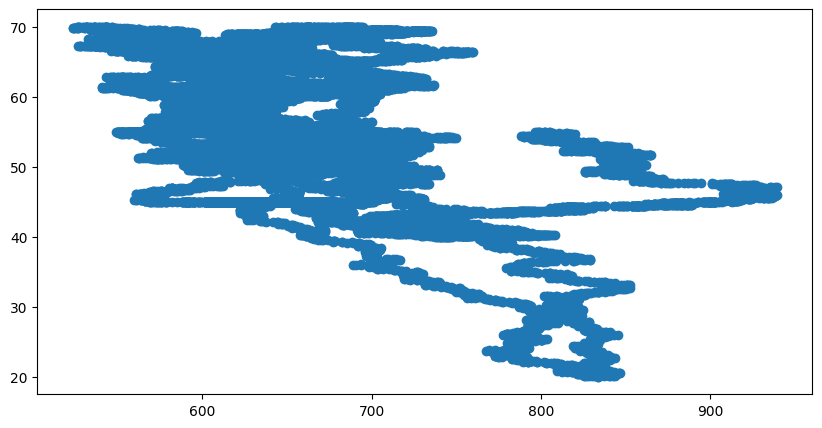

In [ ]:
# plot sunlightindex vs timestamp
obs_df['midprice'] = (obs_df['askPrice'] + obs_df['bidPrice']) / 2
plt.figure(figsize=(10, 5))
plt.scatter(obs_df['midprice'], obs_df['sunlightIndex'], label='Sunlight Index')


In [23]:
macaron_df = r4_df[r4_df['product'] == 'MAGNIFICENT_MACARONS']
pivot = macaron_df.pivot(index='timestamp',
                    columns='product',
                    values='mid_price')
pivot

product,MAGNIFICENT_MACARONS
timestamp,
0,627.5
100,630.5
200,630.5
300,632.5
400,631.5
...,...
2999500,798.0
2999600,802.0
2999700,805.0


In [14]:

# correlation
corr = obs_df['midprice'].corr(obs_df['sunlightIndex'])
print(corr)
print(len(obs_df[obs_df['sunlightIndex'] < 40]))
print(len(obs_df))

-0.5521434174532783
1460
30000


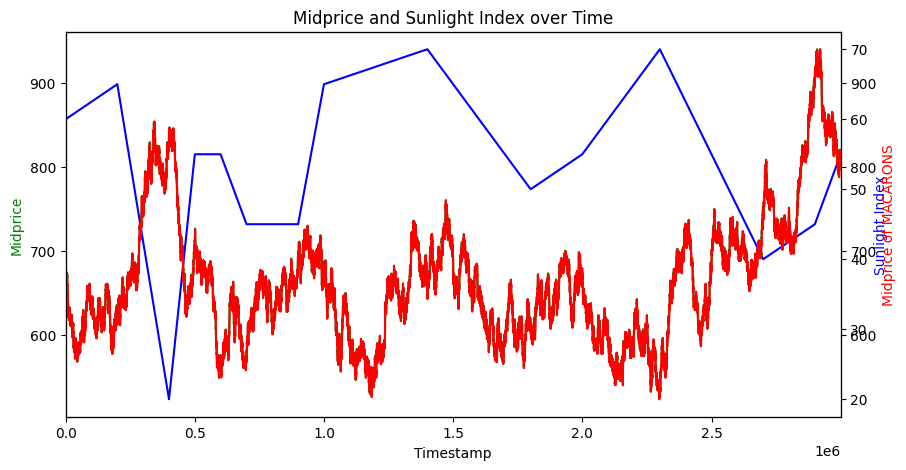

In [24]:
# plot sunlight and midprice over time with two different y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.plot(obs_df['timestamp'], obs_df['midprice'], 'g-')
ax2.plot(obs_df['timestamp'], obs_df['sunlightIndex'], 'b-')
ax3.plot(obs_df['timestamp'], pivot['MAGNIFICENT_MACARONS'], 'r-')
ax1.set_xlim(obs_df['timestamp'].min(), obs_df['timestamp'].max())
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Midprice', color='g')
ax2.set_ylabel('Sunlight Index', color='b')
ax3.set_ylabel('Midprice of MACARONS', color='r')
plt.title('Midprice and Sunlight Index over Time')
plt.show()


,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,midprice
0,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,627.75
1,100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,630.75
2,200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,630.75
3,300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,632.75
4,400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,631.25
...,...,...,...,...,...,...,...,...,...
4995,499500,707.0,708.5,1.1,10.5,-3.5,217.193868,54.82,707.75
4996,499600,710.0,711.5,1.1,10.5,-3.5,217.227372,54.86,710.75
4997,499700,710.0,711.5,1.1,10.5,-3.5,217.296153,54.90,710.75
4998,499800,712.0,713.5,1.1,10.5,-3.5,217.251475,54.93,712.75


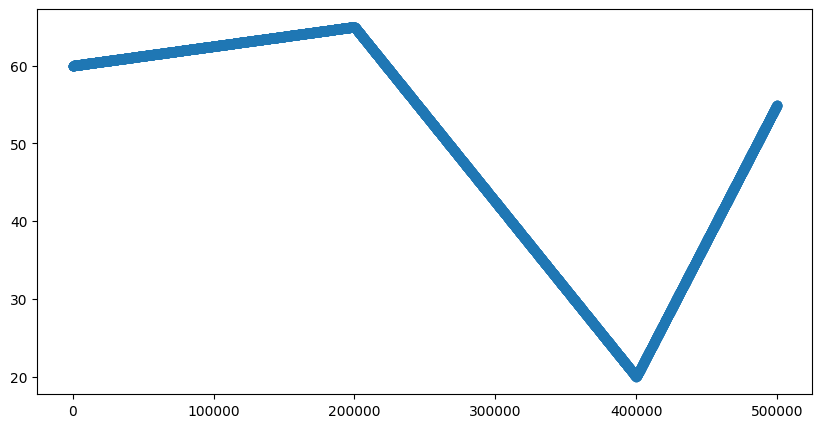

In [21]:
first500k = obs_df.iloc[:5000]
# plot sunlightindex vs timestamp for first 500k rows
plt.figure(figsize=(10, 5))
plt.scatter(first500k['timestamp'], first500k['sunlightIndex'], label='Sunlight Index')
first500k 